<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Classification - Diabetes</p>

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Library</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import colors

warnings.filterwarnings('ignore')

In [2]:
sns.set(rc = {'axes.facecolor': '#f0efeb', 'figure.facecolor': '#f0efeb', 'figure.figsize':(5, 5)})

palette = ["#682F2F","#B9C0C9", "#9F8A78", "#F3AB60"]

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Dataset</p>

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### About the dataset
<br />

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
<br />
<br />

|Variable|Explain|
|-------|-------|
|Pregnancies|Number of times pregnant|
|Glucose|Plasma glucose concentration a 2 hours in an oral glucose tolerance test|
|BloodPressure|Diastolic blood pressure (mm Hg)|
|SkinThickness|Triceps skin fold thickness (mm)|
|Insulin|2-Hour serum insulin (mu U/ml)|
|BMI|Body mass index (weight in kg/(height in m)^2)|
|DiabetesPedigreeFunction|Diabetes pedigree function|
|Age|Age in years|
|Outcome|Class variable (0 or 1)|


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">EDA</p>

In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Min value of 0 on feature does not make sense, and thus 0 should indicate missing values.
<br />
Following feature have zero values:
* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
<br />

Lets replace 0 values with null values.

In [8]:
df_copy = df.copy()
df_copy[['Pregnancies', 'Glucose',
        'BloodPressure', 'SkinThickness',
        'Insulin', 'BMI']] = df_copy[['Pregnancies', 'Glucose',
                                    'BloodPressure', 'SkinThickness',
                                    'Insulin', 'BMI']].replace(0, np.NaN)

In [9]:
df_copy.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

So apparently for features that i've mentioned above contains quite a lot of null values.
<br />
To fill this null values, we need to understand the value distribution.

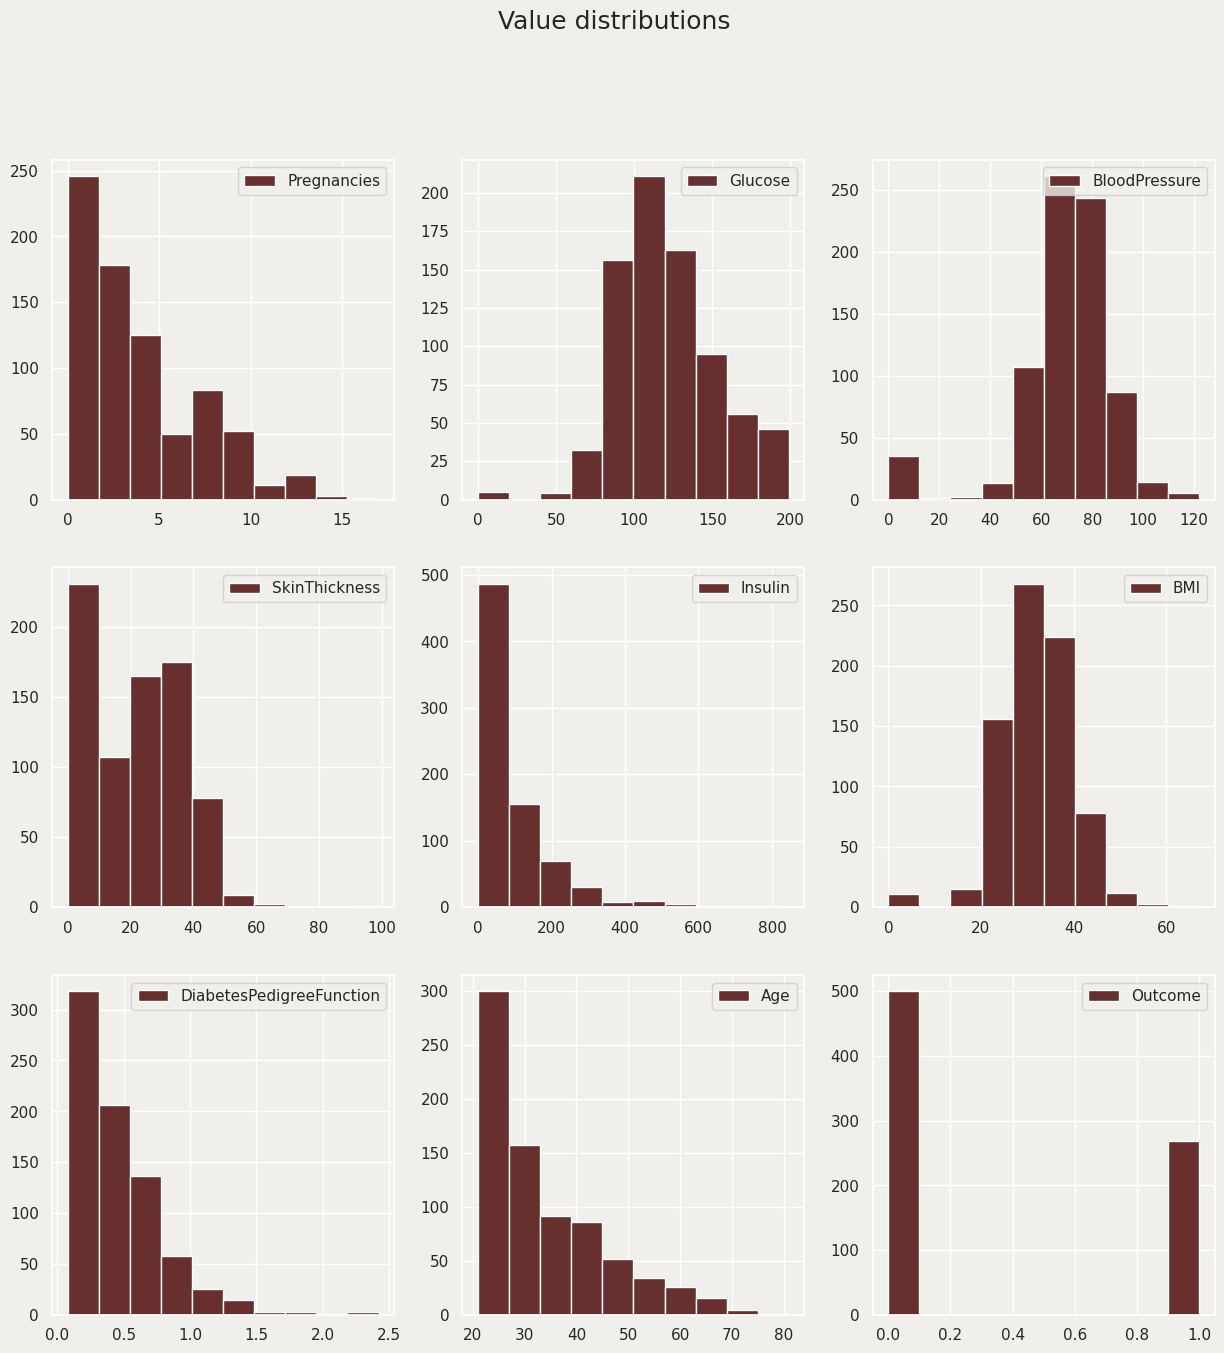

In [10]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

for i, c in enumerate(df.columns):
  ax = axes.flatten()[i]
  ax.hist(df[c], color = palette[0], label = c)
  ax.legend(loc = 'best')

plt.suptitle('Value distributions', size = 18)
plt.show()

In [11]:
df_copy['Pregnancies'].fillna(df_copy['Pregnancies'].median(), inplace = True)
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].median(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].median(), inplace = True)

* Mean - use to impute missing values when the data is normally distributed
* Median - use to impute missing values when the data is skewed

**The value distribution after filling the null values**

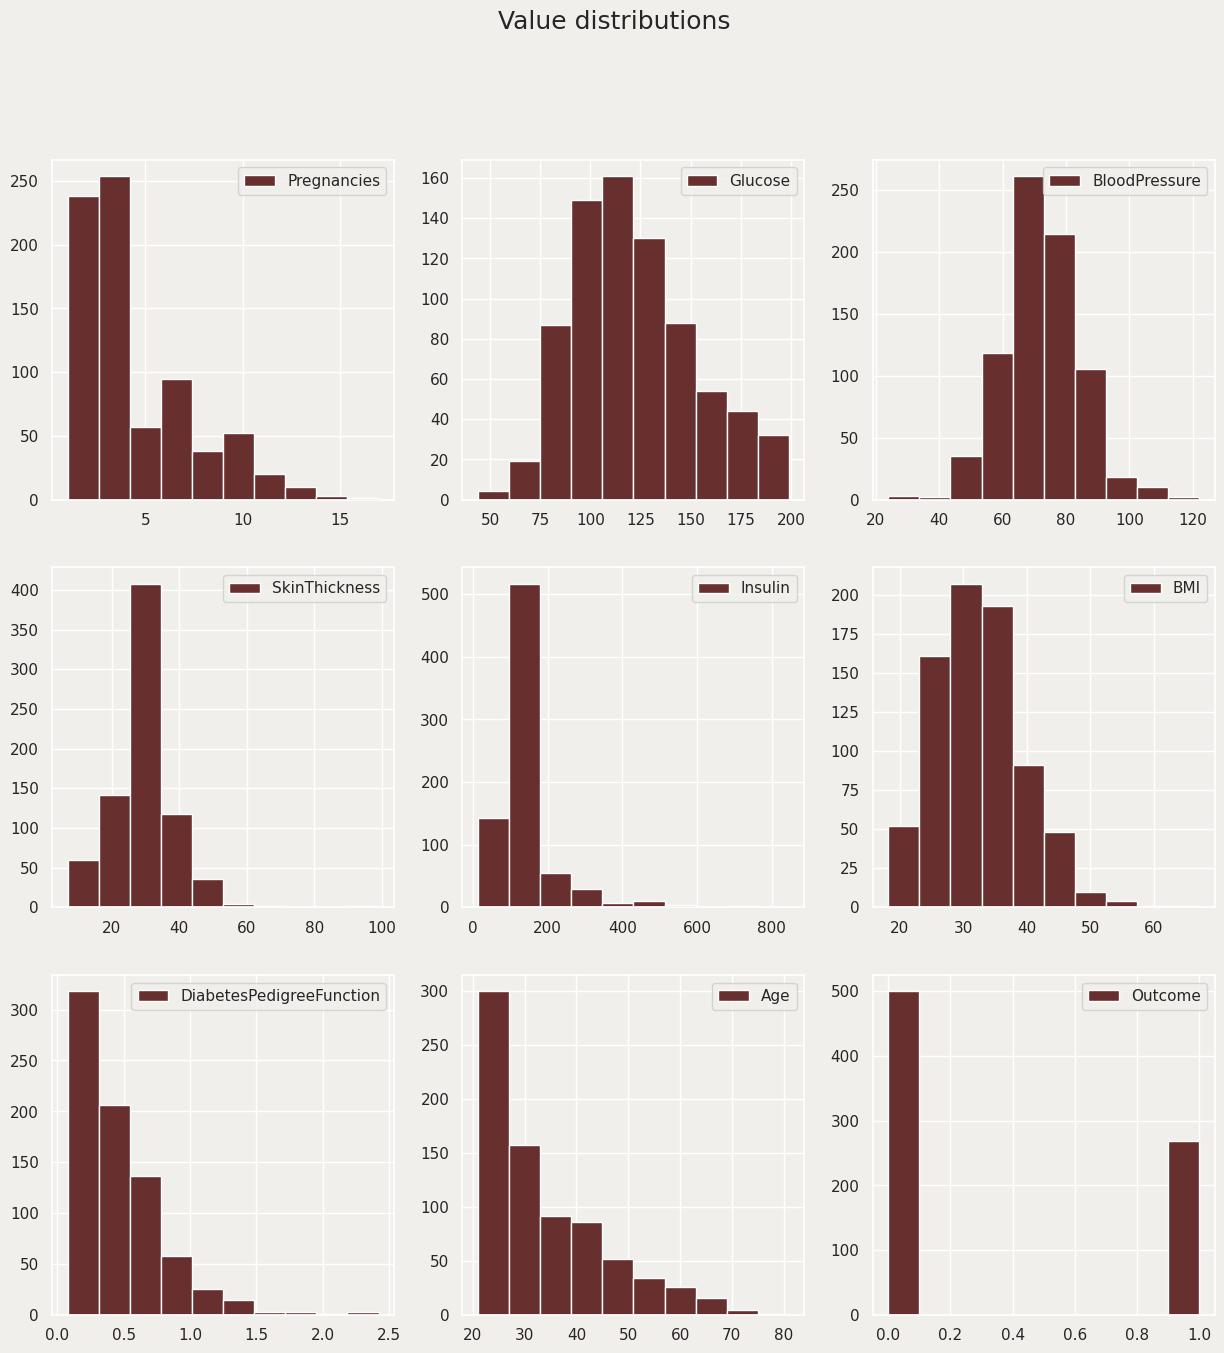

In [12]:
fig, axes = plt.subplots(3, 3, figsize = (15, 15))

for i, c in enumerate(df_copy.columns):
  ax = axes.flatten()[i]
  ax.hist(df_copy[c], color = palette[0], label = c)
  ax.legend(loc = 'best')

plt.suptitle('Value distributions', size = 18)
plt.show()

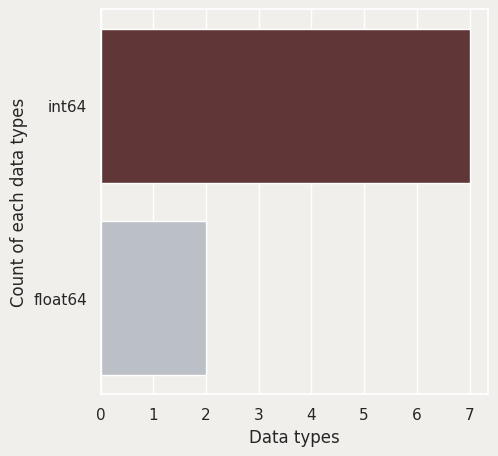

In [13]:
plt.figure(figsize = (5, 5))

sns.countplot(y = df.dtypes, data = df, palette = palette)

plt.xlabel('Data types')
plt.ylabel('Count of each data types')

plt.show()

In [14]:
df_copy['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

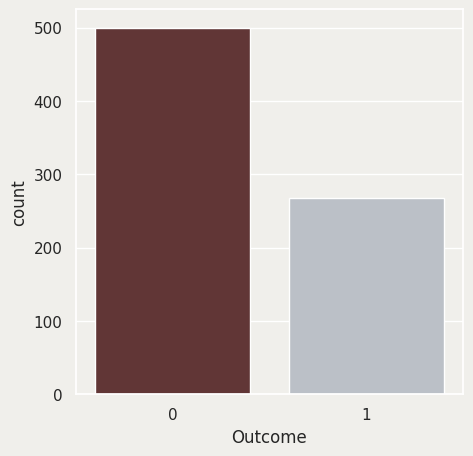

In [15]:
plt.figure(figsize = (5, 5))

sns.countplot(x = 'Outcome', data = df, palette = palette)

plt.show()

<Figure size 1400x1400 with 0 Axes>

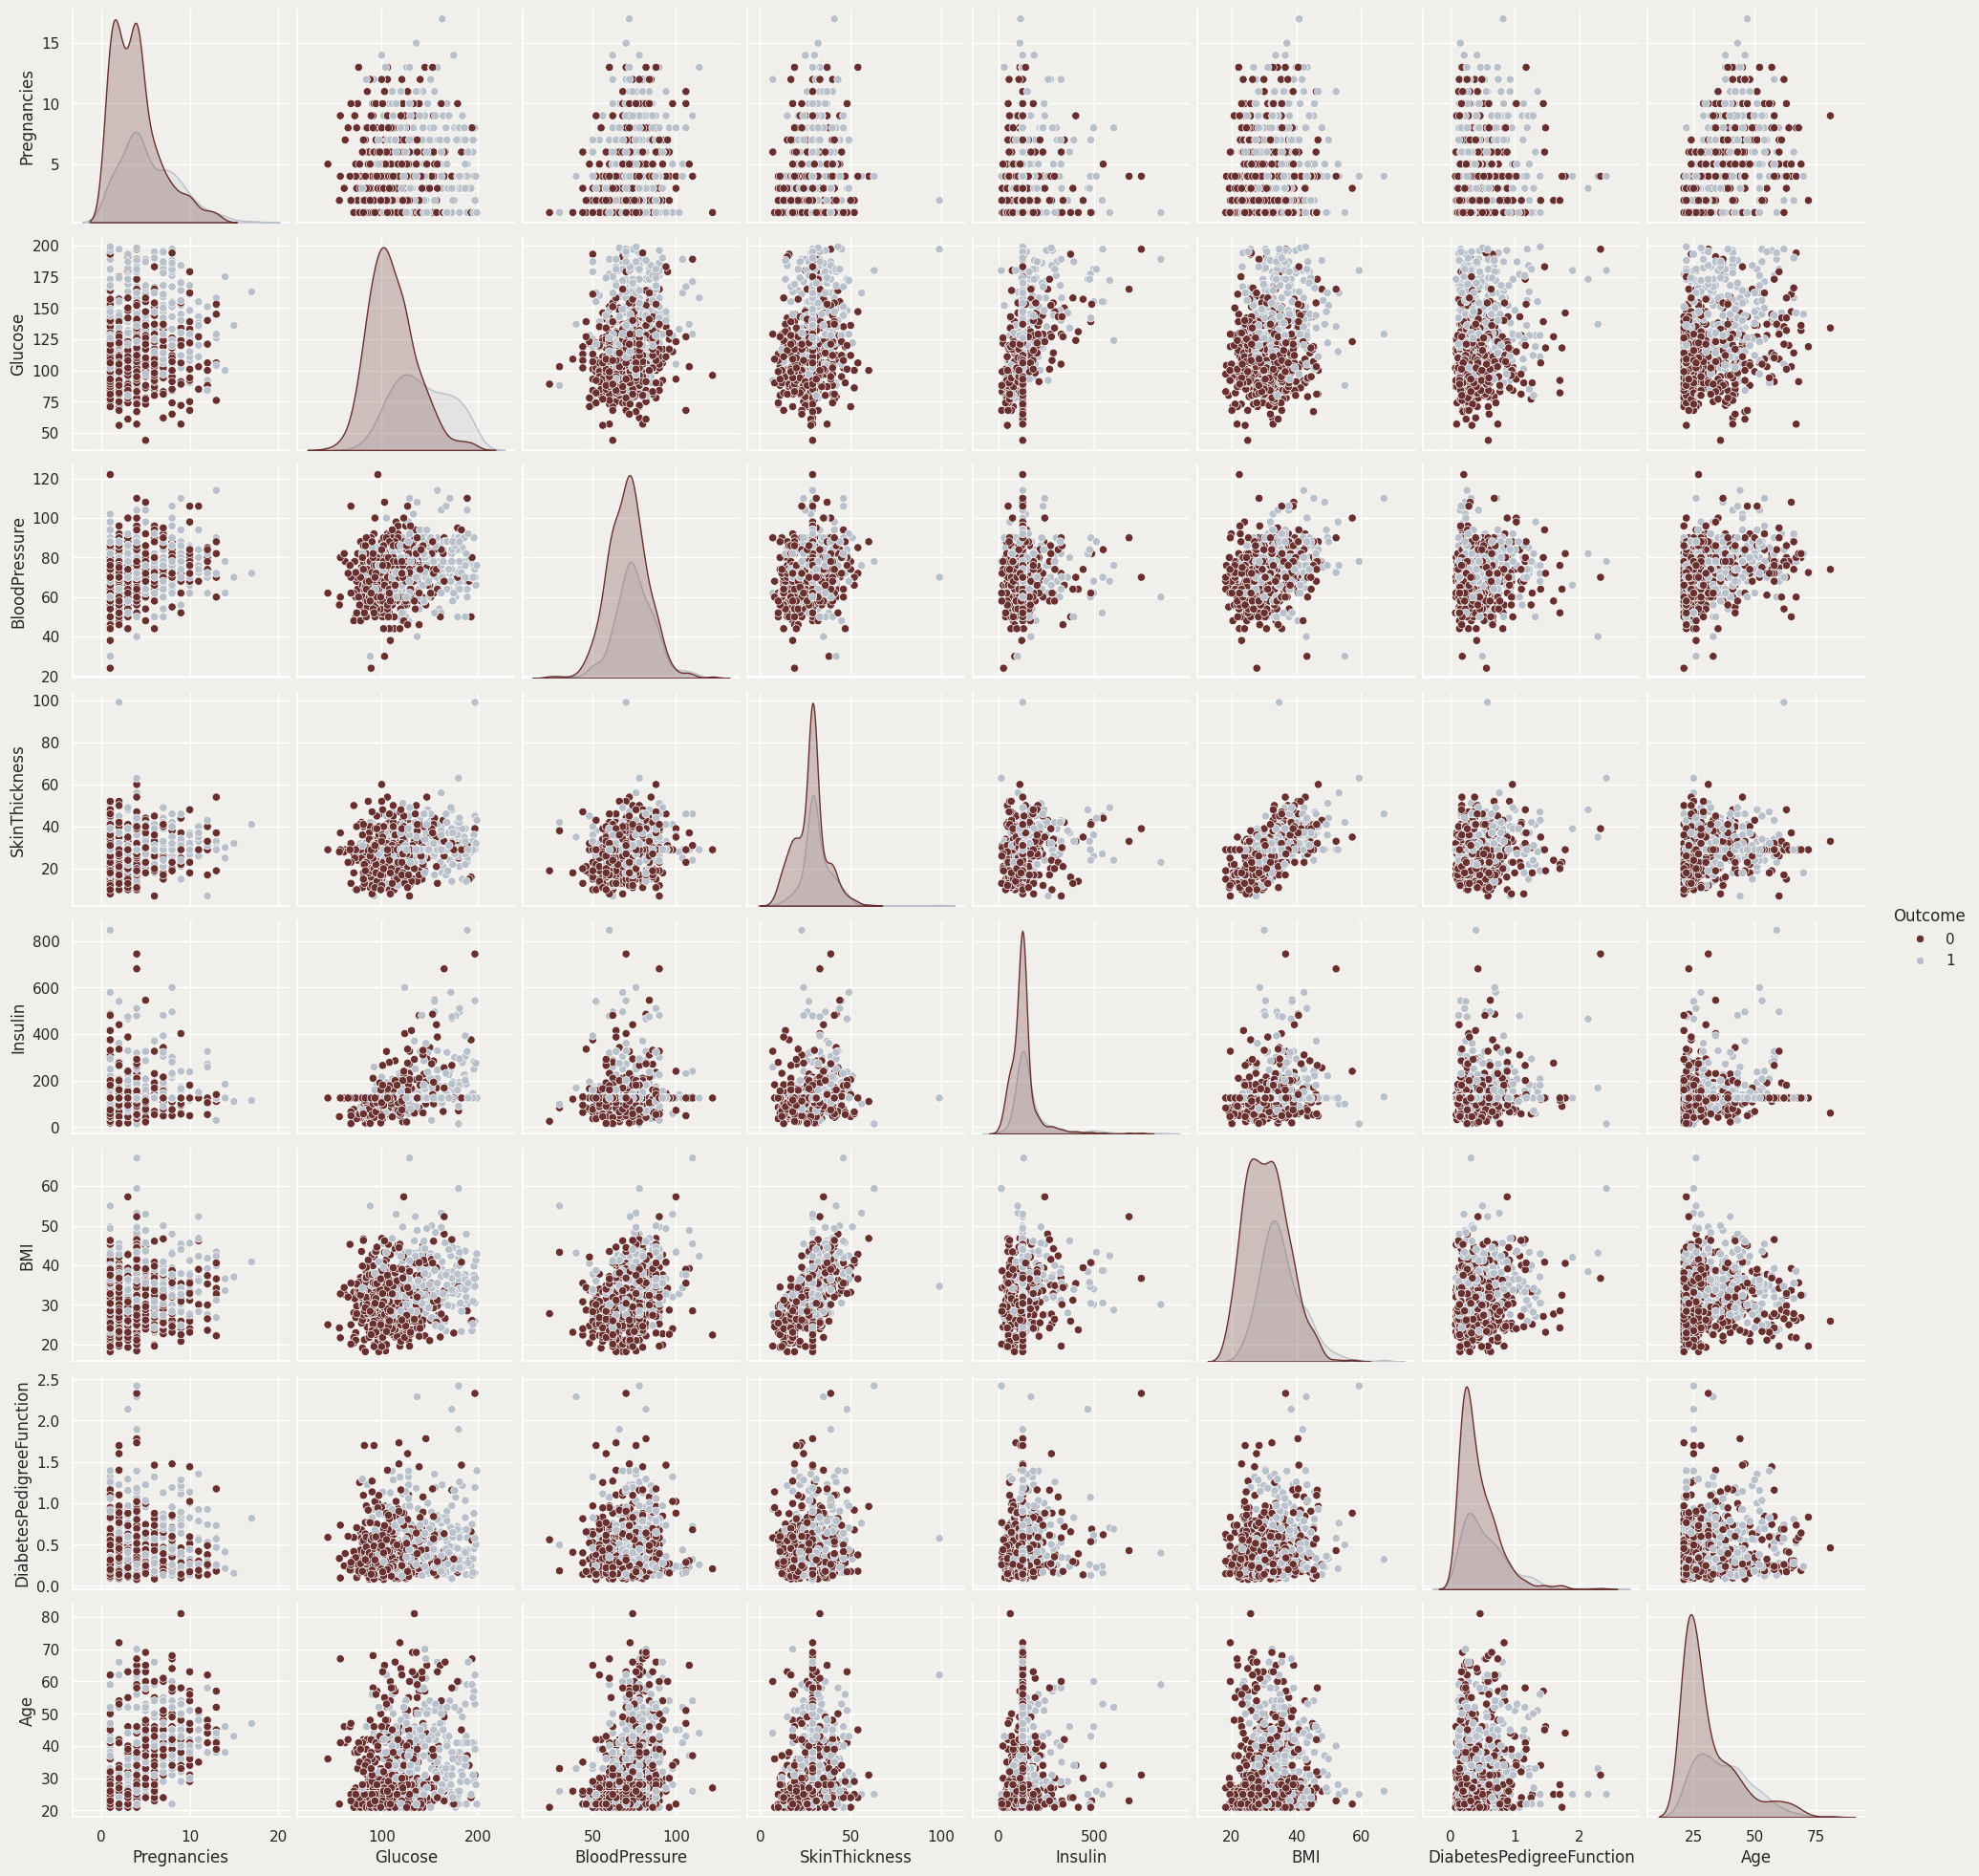

In [16]:
plt.figure(figsize = (14, 14))

sns.pairplot(df_copy, hue = 'Outcome', palette = palette)

plt.show()

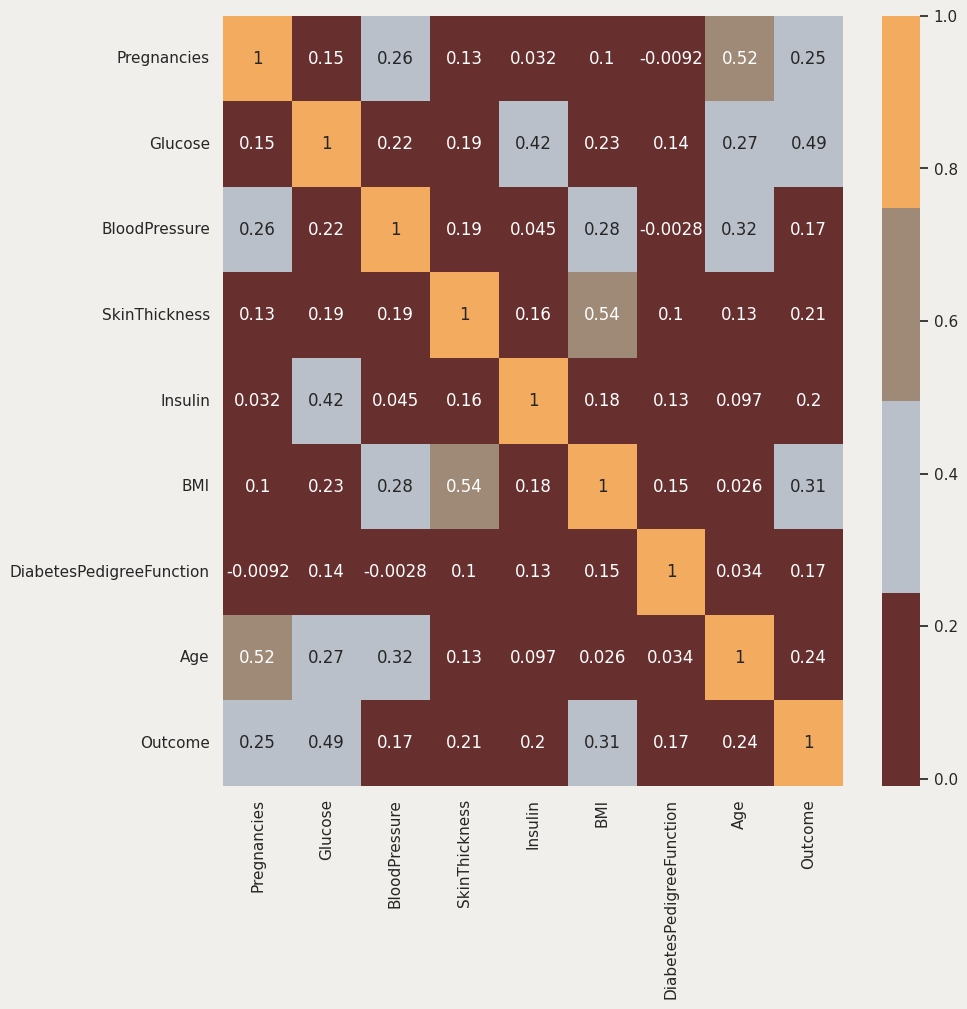

In [17]:
plt.figure(figsize = (10, 10))

corr = df_copy.corr(numeric_only = True)

sns.heatmap(corr, annot = True, cmap = palette)

plt.show()

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Data Preprocessing</p>

In [18]:
X = df_copy.drop('Outcome', axis = 1)
y = df_copy['Outcome']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Modeling and Hyperparameter optimization</p>

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': list(np.arange(3, 35, 1)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2, 3]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator = knn, cv = 10, param_grid = parameters)
knn_cv.fit(X_train, y_train)

print('Best hyperparameters: ', knn_cv.best_params_)
print('Best score: ', knn_cv.best_score_)

Best hyperparameters:  {'n_neighbors': 19, 'p': 2, 'weights': 'uniform'}
Best score:  0.776969857218403


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Model Evalution</p>

In [26]:
knn = KNeighborsClassifier(**knn_cv.best_params_)

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

print('Train accuracy: ', train_score)
print('Test accuracy: ', test_score)

Train accuracy:  0.7882736156351792
Test accuracy:  0.7792207792207793


The gap between the train score and the test core is very small, about 0.09 or 0.9%, which indicates that is no overfitting or underfitting.

In [28]:
pd.crosstab(y_test, y_pred_test, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,86,13,99
1,21,34,55
All,107,47,154


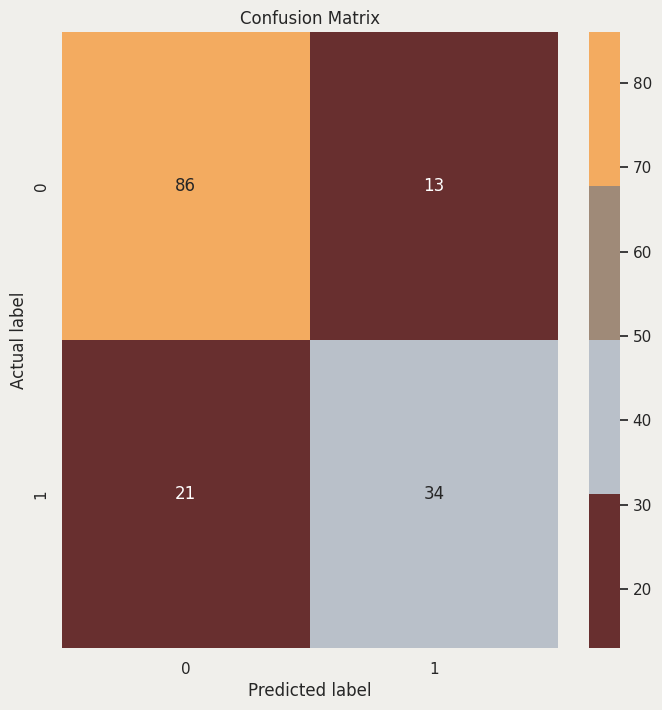

In [30]:
plt.figure(figsize = (8, 8))

cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = palette, fmt = 'g')

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

plt.show()

The model that we build seems pretty good on predicting 0.

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83        99
           1       0.72      0.62      0.67        55

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

